In [1]:
import numpy as np

class GnosticRobustRegression:
    """
    A class to perform Gnostic Robust Regression based on the iterative formula
    described in Equation 19.2 of the provided reference.
    """

    def __init__(self, X, y, criterion="E1", max_iter=100, tol=1e-6):
        """
        Initialize the regression model.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.
        - y: np.ndarray, shape (n_samples,)
            The target vector.
        - criterion: str
            The gnostic criterion to use (e.g., "Q1", "E1", "Q2", etc.).
        - max_iter: int
            Maximum number of iterations for the regression.
        - tol: float
            Tolerance for convergence.
        """
        self.X = X
        self.y = y
        self.criterion = criterion
        self.max_iter = max_iter
        self.tol = tol
        self.weights = np.ones(X.shape[0])  # Initialize weights to 1
        self.coefficients = None

    def _compute_filtering_weight(self, residuals):
        """
        Compute the filtering weights based on the selected gnostic criterion.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The updated filtering weights.
        """
        if self.criterion == "Q1":
            h_q = residuals ** 2
            f_q = 1 / (h_q + 1e-8)  # Avoid division by zero
            return f_q
        elif self.criterion == "E1":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return f_e ** 2
        elif self.criterion == "Q2":
            return np.ones_like(residuals)  # Constant weight for Q2
        elif self.criterion == "E2":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return f_e
        elif self.criterion == "Q3":
            h_q = residuals ** 2
            f_q = 1 / (h_q + 1e-8)
            return 1 / np.sqrt(f_q)
        elif self.criterion == "E3":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return np.sqrt(f_e)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")

    def _update_weights(self, residuals):
        """
        Update the weights based on the residuals and the filtering function.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.
        """
        self.weights = self._compute_filtering_weight(residuals)

    def fit(self):
        """
        Fit the regression model using the iterative weighted least squares approach.
        """
        n_samples, n_features = self.X.shape
        X_weighted = self.X.copy()
        y_weighted = self.y.copy()

        # Initialize coefficients
        self.coefficients = np.zeros(n_features)

        for iteration in range(self.max_iter):
            # Compute residuals
            residuals = self.y - np.dot(self.X, self.coefficients)

            # Update weights
            self._update_weights(residuals)

            # Apply weights to the design matrix and target vector
            W = np.sqrt(self.weights)[:, np.newaxis]
            X_weighted = W * self.X
            y_weighted = W.flatten() * self.y

            # Solve the weighted least squares problem
            new_coefficients = np.linalg.lstsq(X_weighted, y_weighted, rcond=None)[0]

            # Check for convergence
            if np.linalg.norm(new_coefficients - self.coefficients) < self.tol:
                print(f"Converged in {iteration + 1} iterations.")
                break

            self.coefficients = new_coefficients
        else:
            print("Maximum iterations reached without convergence.")

    def predict(self, X):
        """
        Predict target values for the given input data.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.

        Returns:
        - y_pred: np.ndarray, shape (n_samples,)
            The predicted target values.
        """
        return np.dot(X, self.coefficients)

    def get_weights(self):
        """
        Get the final weights after fitting the model.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The final weights.
        """
        return self.weights

    def get_coefficients(self):
        """
        Get the fitted coefficients of the model.

        Returns:
        - coefficients: np.ndarray, shape (n_features,)
            The fitted coefficients.
        """
        return self.coefficients



In [2]:

# Example usage:
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.rand(100, 2)
    true_coefficients = np.array([3, -2])
    y = np.dot(X, true_coefficients) + np.random.normal(0, 0.1, size=100)

    # Initialize and fit the model
    model = GnosticRobustRegression(X, y, criterion="Q1")
    model.fit()

    # Print results
    print("Fitted coefficients:", model.get_coefficients())
    print("Final weights:", model.get_weights())

Converged in 9 iterations.
Fitted coefficients: [ 2.73526796 -1.69356804]
Final weights: [1.47725545e+01 8.87901196e+02 1.92216931e+03 9.67575795e+00
 6.03394287e+01 1.67445383e+01 7.64092820e+02 3.01519802e+02
 3.16584684e+01 9.27831504e+01 1.80936847e+01 7.30598394e+01
 1.80627078e+03 2.48471324e+02 1.97876756e+01 1.12409900e+01
 1.12542236e+01 2.19747275e+02 6.83840725e+02 8.01621580e+02
 6.18628651e+01 1.80422816e+01 8.76030176e+01 2.89860149e+04
 1.25156847e+02 3.69509450e+01 3.70477443e+02 4.57721384e+01
 1.48633432e+03 3.32452876e+01 1.31079238e+02 3.98959064e+01
 7.65790227e+01 5.31926262e+01 1.80533070e+01 5.38578435e+01
 9.01256167e+00 2.83693291e+01 5.34048980e+01 4.75419034e+01
 2.88229343e+02 3.13803079e+02 9.99778504e+07 7.58318119e+02
 3.12469400e+05 3.39883035e+01 8.05614952e+02 2.64288412e+02
 5.37060764e+02 1.13012991e+03 1.62729490e+02 9.31883262e+02
 1.46751865e+03 2.13018984e+01 1.27721440e+02 1.61529364e+02
 4.00132745e+02 1.22330591e+01 2.21087348e+01 2.93534844e

Converged in 8 iterations.


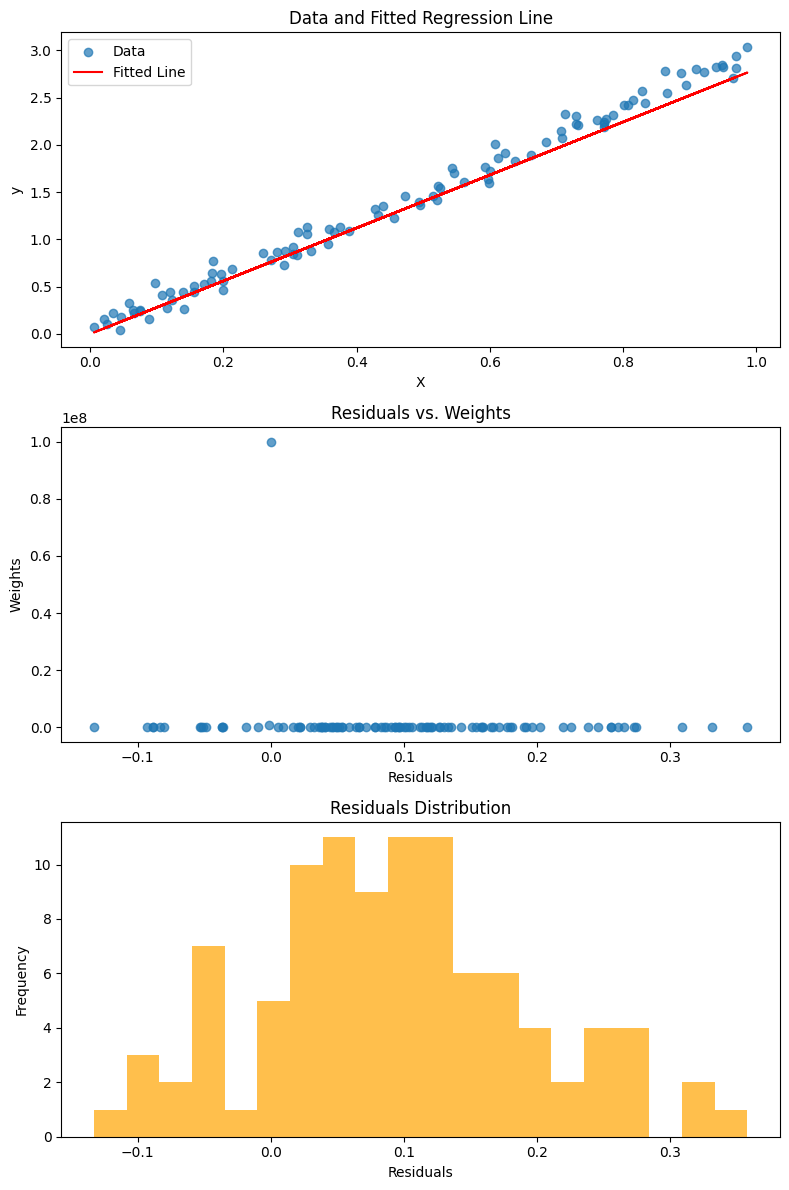

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)  # Single feature for 2D visualization
true_coefficients = np.array([3])
y = np.dot(X, true_coefficients) + np.random.normal(0, 0.1, size=100)

# Initialize and fit the model
model = GnosticRobustRegression(X, y, criterion="Q1")
model.fit()

# Get predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred
weights = model.get_weights()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# 1. Scatter plot of data and fitted regression line
axs[0].scatter(X, y, label="Data", alpha=0.7)
axs[0].plot(X, y_pred, color="red", label="Fitted Line")
axs[0].set_title("Data and Fitted Regression Line")
axs[0].set_xlabel("X")
axs[0].set_ylabel("y")
axs[0].legend()

# 2. Residuals vs. Weights
axs[1].scatter(residuals, weights, alpha=0.7)
axs[1].set_title("Residuals vs. Weights")
axs[1].set_xlabel("Residuals")
axs[1].set_ylabel("Weights")

# 3. Residuals Distribution
axs[2].hist(residuals, bins=20, alpha=0.7, color="orange")
axs[2].set_title("Residuals Distribution")
axs[2].set_xlabel("Residuals")
axs[2].set_ylabel("Frequency")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [4]:
# True function: nonlinear
def true_function(x):
    return 2.0 * np.exp(1.5 * x)

# Generate input data
N = 10
x_true = np.linspace(0, 2, N)
z_true = true_function(x_true)

# Add small Gaussian noise
x_obs = x_true + np.random.normal(0, 0.05, N)
Z_obs = z_true + np.random.normal(0, 0.2, N)

# Initialize and fit the model
model = GnosticRobustRegression(x_obs.reshape(-1,1), Z_obs, criterion="E1")
model.fit()

# Get predictions and residuals
y_pred = model.predict(X).flatten()
residuals = y - y_pred
weights = model.get_weights()

print("Fitted coefficients:", model.get_coefficients())
print("Final weights:", model.get_weights())

Converged in 4 iterations.
Fitted coefficients: [8.64102293]
Final weights: [5.25074896e-02 3.67267128e+02 9.99999987e+15 9.47661339e-02
 2.37056982e+01 1.82746234e-01 4.99126477e-03 4.88817590e-04
 2.96369134e-05 3.79440656e-06]


Converged in 8 iterations.
Fitted coefficients: [2.8012938]
Final weights: [1.44711529e+02 3.95493658e+01 4.18239064e+01 1.57034971e+02
 1.22495748e+04 2.24718493e+02 3.93912156e+01 6.91127779e+01
 6.71296367e+02 1.22034999e+02 1.09346999e+02 1.96477673e+01
 7.91029707e+01 1.14338366e+02 4.75944185e+02 5.62712546e+01
 1.05172331e+04 1.95574603e+02 4.60114368e+02 1.27727696e+02
 4.37469701e+01 3.45183025e+02 2.91583203e+02 4.10776862e+02
 3.85778971e+02 7.70077478e+01 3.42188402e+04 2.07476936e+03
 9.68982228e+01 4.05901772e+02 1.04501741e+01 3.79361359e+02
 6.68339849e+02 3.04887567e+01 9.99999757e+07 4.00667054e+01
 2.25777760e+02 1.41615685e+01 7.33956072e+01 7.22884012e+01
 2.31610550e+03 2.93027637e+03 6.81710990e+01 1.52729938e+01
 5.86970746e+01 6.03429197e+02 2.44544978e+01 7.36638865e+02
 3.57192139e+01 1.52853706e+01 1.14121043e+02 1.05423105e+02
 2.58591729e+01 6.15532085e+01 7.60577108e+02 2.76896228e+01
 1.27255807e+02 1.34262630e+02 1.45314583e+02 2.07292027e+01
 8.3050633

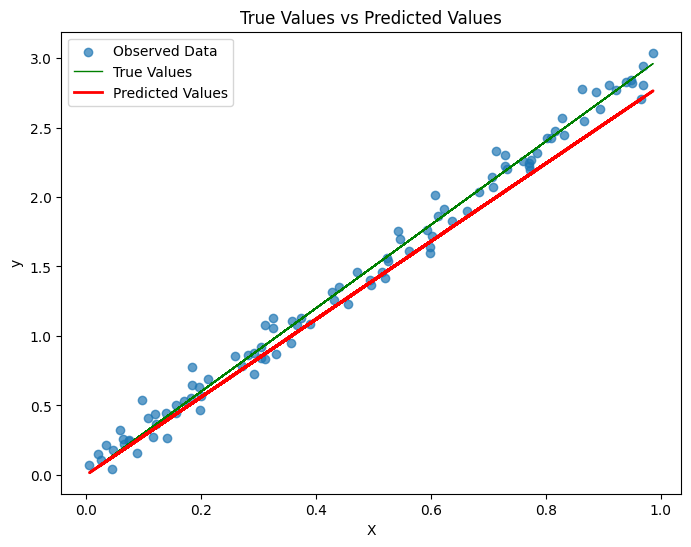

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)  # Single feature for 2D visualization
true_coefficients = np.array([3])
y_true = np.dot(X, true_coefficients)  # True values without noise

# Add noise to create observed data
y_observed = y_true + np.random.normal(0, 0.1, size=100)

# Initialize and fit the model
model = GnosticRobustRegression(X, y_observed, criterion="Q1")
model.fit()

# Get predictions
y_pred = model.predict(X)
weights = model.get_weights()

print("Fitted coefficients:", model.get_coefficients())
print("Final weights:", model.get_weights())

# Plotting true values and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X, y_observed, label="Observed Data", alpha=0.7)
plt.plot(X, y_true, color="green", label="True Values", linewidth=1)
plt.plot(X, y_pred, color="red", label="Predicted Values", linewidth=2)
plt.title("True Values vs Predicted Values")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Converged in 4 iterations.


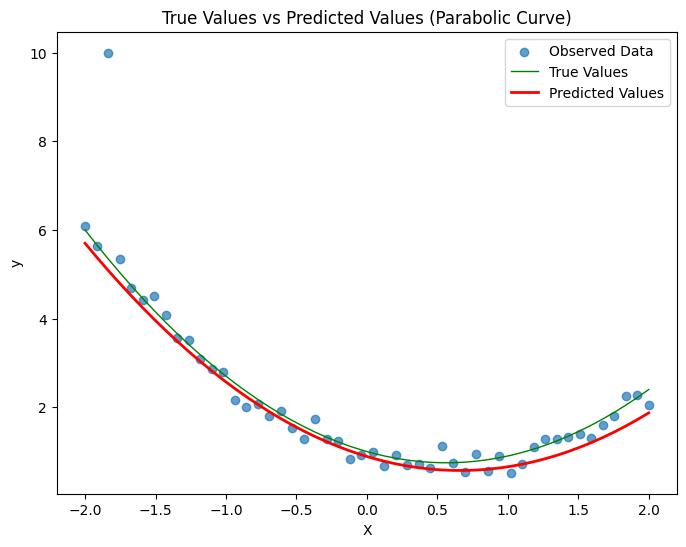

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic parabolic data
np.random.seed(42)
X = np.linspace(-2, 2, 50).reshape(-1, 1)  # Single feature for 2D visualization
true_coefficients = np.array([1, -0.9, 0.8])  # Coefficients for a parabolic curve
y_true = true_coefficients[0] + true_coefficients[1] * X + true_coefficients[2] * X**2  # True parabolic values

# Add noise to create observed data
y_observed = y_true + np.random.normal(0, 0.2, size=X.shape)
#outlier one sample
y_observed[2] = 10  # Introduce an outlier

# Prepare the design matrix for polynomial regression (include X and X^2)
X_poly = np.hstack([np.ones_like(X), X, X**2])

# Initialize and fit the model
model = GnosticRobustRegression(X_poly, y_observed.flatten(), criterion="E1")
model.fit()

# Get predictions
y_pred = model.predict(X_poly)

# Plotting true values and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X, y_observed, label="Observed Data", alpha=0.7)
plt.plot(X, y_true, color="green", label="True Values", linewidth=1)
plt.plot(X, y_pred, color="red", label="Predicted Values", linewidth=2)
plt.title("True Values vs Predicted Values (Parabolic Curve)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Converged in 5 iterations.


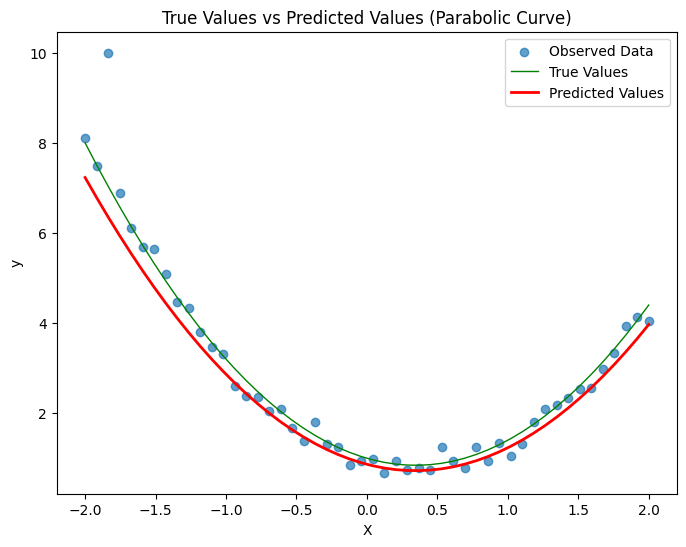

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic parabolic data
# Generate synthetic data
# np.random.seed(42)
# X = np.random.rand(100, 1)  # Single feature
# y_true = 6 * X[:, 0]**2 - 2 * X[:, 0] + 1  # True quadratic function
# y_observed = y_true + np.random.normal(0, 0.1, size=100)  # Add noise to create observed data
np.random.seed(42)
X = np.linspace(-2, 2, 50).reshape(-1, 1)  # Single feature for 2D visualization
true_coefficients = np.array([1, -0.9, 1.3])  # Coefficients for a parabolic curve
y_true = true_coefficients[0] + true_coefficients[1] * X + true_coefficients[2] * X**2  # True parabolic values

# Add noise to create observed data
y_observed = y_true + np.random.normal(0, 0.2, size=X.shape)
#outlier one sample
y_observed[2] = 10  # Introduce an outlier

# Prepare the design matrix for polynomial regression (include X and X^2)
X_poly = np.hstack([np.ones_like(X), X, X**2])

# Initialize and fit the model
model = GnosticRobustRegression(X_poly, y_observed.flatten(), criterion="E1")
model.fit()

# Get predictions
y_pred = model.predict(X_poly)

# sorting x values for plotting
X_sorted = np.argsort(X[:, 0])
X = X[X_sorted]
y_observed = y_observed[X_sorted]
y_true = y_true[X_sorted]
y_pred = y_pred[X_sorted]

# Plotting true values and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X, y_observed, label="Observed Data", alpha=0.7)
plt.plot(X, y_true, color="green", label="True Values", linewidth=1)
plt.plot(X, y_pred, color="red", label="Predicted Values", linewidth=2)
plt.title("True Values vs Predicted Values (Parabolic Curve)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [7]:
!pip install scikit-learn

In [8]:
import numpy as np

class GnosticRobustRegression:
    """
    A class to perform Gnostic Robust Regression based on the iterative formula
    described in Equation 19.2 of the provided reference.
    """

    def __init__(self, X, y, criterion="E1", max_iter=100, tol=1e-6):
        """
        Initialize the regression model.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.
        - y: np.ndarray, shape (n_samples,)
            The target vector.
        - criterion: str
            The gnostic criterion to use (e.g., "Q1", "E1", "Q2", etc.).
        - max_iter: int
            Maximum number of iterations for the regression.
        - tol: float
            Tolerance for convergence.

        This method initializes the model parameters:
        - `weights` are initialized to 1 for all samples, as described in the IWLS approach.
        - `coefficients` are initialized to `None` and will be computed during fitting.
        """
        self.X = X
        self.y = y
        self.criterion = criterion
        self.max_iter = max_iter
        self.tol = tol
        self.weights = np.ones(X.shape[0])  # Initialize weights to 1
        self.coefficients = None

    def _compute_filtering_weight(self, residuals):
        """
        Compute the filtering weights based on the selected gnostic criterion.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The updated filtering weights.

        This method implements the filtering weights (FW) as defined in Table 19.2 of the book:
        - Q1: f_q = 1 / h_q, where h_q = residual^2
        - E1: f_e^2 = 1 / h_e^2, where h_e = residual^2
        - Q2: Constant weight (1)
        - E2: f_e = 1 / h_e
        - Q3: 1 / sqrt(f_q)
        - E3: sqrt(f_e)
        """
        if self.criterion == "Q1":
            h_q = residuals ** 2
            f_q = 1 / (h_q + 1e-8)  # Avoid division by zero
            return f_q
        elif self.criterion == "E1":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return f_e ** 2
        elif self.criterion == "Q2":
            return np.ones_like(residuals)  # Constant weight for Q2
        elif self.criterion == "E2":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return f_e
        elif self.criterion == "Q3":
            h_q = residuals ** 2
            f_q = 1 / (h_q + 1e-8)
            return 1 / np.sqrt(f_q)
        elif self.criterion == "E3":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return np.sqrt(f_e)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")

    def _update_weights(self, residuals):
        """
        Update the weights based on the residuals and the filtering function.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.

        This method updates the weights using the filtering weights computed
        in `_compute_filtering_weight`. The weights are used to adjust the
        influence of each data point in the regression.
        """
        self.weights = self._compute_filtering_weight(residuals)

    def fit(self):
        """
        Fit the regression model using the iterative weighted least squares approach.

        This method implements the iterative formula described in Equation 19.2:
        c_{k+1} - c_k = [sum(G_i G_i^T)]^-1 [sum(G_i E_i)]
        where:
        - G_i = f_e^2 sqrt(-D_i') g_i (Equation 19.3)
        - E_i = s D_i' / sqrt(-D_i') (Equation 19.5)

        The process involves:
        1. Computing residuals.
        2. Updating weights based on residuals.
        3. Applying weights to the design matrix and target vector.
        4. Solving the weighted least squares problem iteratively.
        """
        n_samples, n_features = self.X.shape
        X_weighted = self.X.copy()
        y_weighted = self.y.copy()

        # Initialize coefficients
        self.coefficients = np.zeros(n_features)

        for iteration in range(self.max_iter):
            # Compute residuals
            residuals = self.y - np.dot(self.X, self.coefficients)

            # Update weights
            self._update_weights(residuals)

            # Apply weights to the design matrix and target vector
            W = np.sqrt(self.weights)[:, np.newaxis]
            X_weighted = W * self.X
            y_weighted = W.flatten() * self.y

            # Solve the weighted least squares problem
            new_coefficients = np.linalg.lstsq(X_weighted, y_weighted, rcond=None)[0]

            # Check for convergence
            if np.linalg.norm(new_coefficients - self.coefficients) < self.tol:
                print(f"Converged in {iteration + 1} iterations.")
                break

            self.coefficients = new_coefficients
        else:
            print("Maximum iterations reached without convergence.")

    def predict(self, X):
        """
        Predict target values for the given input data.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.

        Returns:
        - y_pred: np.ndarray, shape (n_samples,)
            The predicted target values.

        This method uses the fitted coefficients to predict target values:
        y_pred = X * coefficients
        """
        return np.dot(X, self.coefficients)

    def get_weights(self):
        """
        Get the final weights after fitting the model.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The final weights.

        This method provides access to the final weights, which represent
        the influence of each data point after fitting.
        """
        return self.weights

    def get_coefficients(self):
        """
        Get the fitted coefficients of the model.

        Returns:
        - coefficients: np.ndarray, shape (n_features,)
            The fitted coefficients.

        This method provides access to the fitted coefficients, which define
        the regression model.
        """
        return self.coefficients

Converged in 55 iterations.


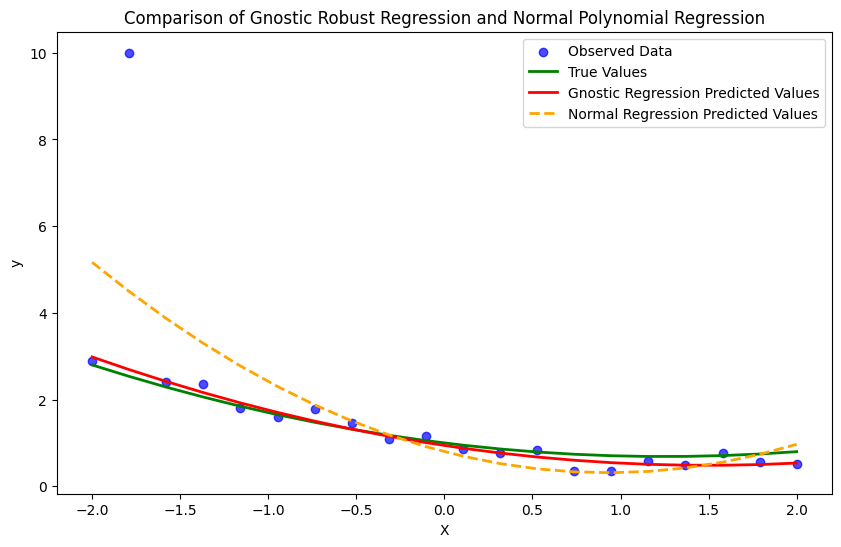

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic parabolic data
np.random.seed(42)
X = np.linspace(-2, 2, 20).reshape(-1, 1)  # Single feature for 2D visualization
true_coefficients = np.array([1, -0.5, 0.2])  # Coefficients for a parabolic curve
y_true = true_coefficients[0] + true_coefficients[1] * X + true_coefficients[2] * X**2  # True parabolic values

# Add noise to create observed data
y_observed = y_true + np.random.normal(0, 0.2, size=X.shape)
y_observed[1] =  10
# y_observed[19] = 11  # Introduce an outlier

# Prepare the design matrix for polynomial regression (include X and X^2)
X_poly = np.hstack([np.ones_like(X), X, X**2])

# --- Gnostic Robust Regression ---
# Initialize and fit the Gnostic Robust Regression model
gnostic_model = GnosticRobustRegression(X_poly, y_observed.flatten(), criterion="E3")
gnostic_model.fit()
y_pred_gnostic = gnostic_model.predict(X_poly)

# --- Normal Polynomial Regression ---
# Initialize and fit the normal polynomial regression model
normal_model = LinearRegression()
normal_model.fit(X_poly, y_observed.flatten())
y_pred_normal = normal_model.predict(X_poly)

# Plotting true values, observed data, and predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y_observed, label="Observed Data", alpha=0.7, color="blue")
plt.plot(X, y_true, color="green", label="True Values", linewidth=2)
plt.plot(X, y_pred_gnostic, color="red", label="Gnostic Regression Predicted Values", linewidth=2)
plt.plot(X, y_pred_normal, color="orange", label="Normal Regression Predicted Values", linewidth=2, linestyle="--")
plt.title("Comparison of Gnostic Robust Regression and Normal Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [10]:
weights = gnostic_model.get_weights()

print("Fitted coefficients:", gnostic_model.get_coefficients())
print("Final weights:", gnostic_model.get_weights())

Fitted coefficients: [ 0.94167802 -0.61165964  0.2046342 ]
Final weights: [1.18777072e+01 1.36827165e-01 9.99874847e+03 4.96394492e+00
 8.06373490e+00 1.01576974e+01 3.45574793e+00 6.58948133e+00
 1.40260233e+01 6.45040510e+00 4.41316297e+01 9.69748600e+03
 6.09017182e+00 4.08873126e+00 5.40429449e+00 1.45050548e+01
 6.25482377e+03 3.49744826e+00 1.62102103e+01 5.16621016e+01]


In [11]:
import numpy as np

class GnosticRobustRegression:
    """
    A class to perform Gnostic Robust Regression based on the iterative formula
    described in Equation 19.2 of the provided reference, with support for polynomial regression.
    """

    def __init__(self, X, y, criterion="E1", max_iter=100, tol=1e-6, degree=1):
        """
        Initialize the regression model.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.
        - y: np.ndarray, shape (n_samples,)
            The target vector.
        - criterion: str
            The gnostic criterion to use (e.g., "Q1", "E1", "Q2", etc.).
        - max_iter: int
            Maximum number of iterations for the regression.
        - tol: float
            Tolerance for convergence.
        - degree: int
            The degree of the polynomial regression. Default is 1 (linear regression).
        """
        self.degree = degree
        self.X = self._expand_features(X, degree)
        self.y = y
        self.criterion = criterion
        self.max_iter = max_iter
        self.tol = tol
        self.weights = np.ones(self.X.shape[0])  # Initialize weights to 1
        self.coefficients = None

    def _expand_features(self, X, degree):
        """
        Expand the input feature matrix to include polynomial terms up to the specified degree.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.
        - degree: int
            The degree of the polynomial regression.

        Returns:
        - X_expanded: np.ndarray, shape (n_samples, n_expanded_features)
            The expanded feature matrix with polynomial terms.
        """
        X_expanded = X
        for d in range(2, degree + 1):
            X_expanded = np.hstack([X_expanded, X ** d])
        return X_expanded

    def _compute_filtering_weight(self, residuals):
        """
        Compute the filtering weights based on the selected gnostic criterion.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The updated filtering weights.
        """
        if self.criterion == "Q1":
            h_q = residuals ** 2
            f_q = 1 / (h_q + 1e-8)  # Avoid division by zero
            return f_q
        elif self.criterion == "E1":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return f_e ** 2
        elif self.criterion == "Q2":
            return np.ones_like(residuals)  # Constant weight for Q2
        elif self.criterion == "E2":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return f_e
        elif self.criterion == "Q3":
            h_q = residuals ** 2
            f_q = 1 / (h_q + 1e-8)
            return 1 / np.sqrt(f_q)
        elif self.criterion == "E3":
            h_e = residuals ** 2
            f_e = 1 / (h_e + 1e-8)
            return np.sqrt(f_e)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")

    def _update_weights(self, residuals):
        """
        Update the weights based on the residuals and the filtering function.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.
        """
        self.weights = self._compute_filtering_weight(residuals)

    def fit(self):
        """
        Fit the regression model using the iterative weighted least squares approach.

        This method implements the iterative formula described in Equation 19.2:
        c_{k+1} - c_k = [sum(G_i G_i^T)]^-1 [sum(G_i E_i)]
        """
        n_samples, n_features = self.X.shape
        X_weighted = self.X.copy()
        y_weighted = self.y.copy()

        # Initialize coefficients
        self.coefficients = np.zeros(n_features)

        for iteration in range(self.max_iter):
            # Compute residuals
            residuals = self.y - np.dot(self.X, self.coefficients)

            # Update weights
            self._update_weights(residuals)

            # Apply weights to the design matrix and target vector
            W = np.sqrt(self.weights)[:, np.newaxis]
            X_weighted = W * self.X
            y_weighted = W.flatten() * self.y

            # Solve the weighted least squares problem
            new_coefficients = np.linalg.lstsq(X_weighted, y_weighted, rcond=None)[0]

            # Check for convergence
            if np.linalg.norm(new_coefficients - self.coefficients) < self.tol:
                print(f"Converged in {iteration + 1} iterations.")
                break

            self.coefficients = new_coefficients
        else:
            print("Maximum iterations reached without convergence.")

    def predict(self, X):
        """
        Predict target values for the given input data.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.

        Returns:
        - y_pred: np.ndarray, shape (n_samples,)
            The predicted target values.
        """
        X_expanded = self._expand_features(X, self.degree)
        return np.dot(X_expanded, self.coefficients)

    def get_weights(self):
        """
        Get the final weights after fitting the model.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The final weights.
        """
        return self.weights

    def get_coefficients(self):
        """
        Get the fitted coefficients of the model.

        Returns:
        - coefficients: np.ndarray, shape (n_features,)
            The fitted coefficients.
        """
        return self.coefficients

Converged in 6 iterations.


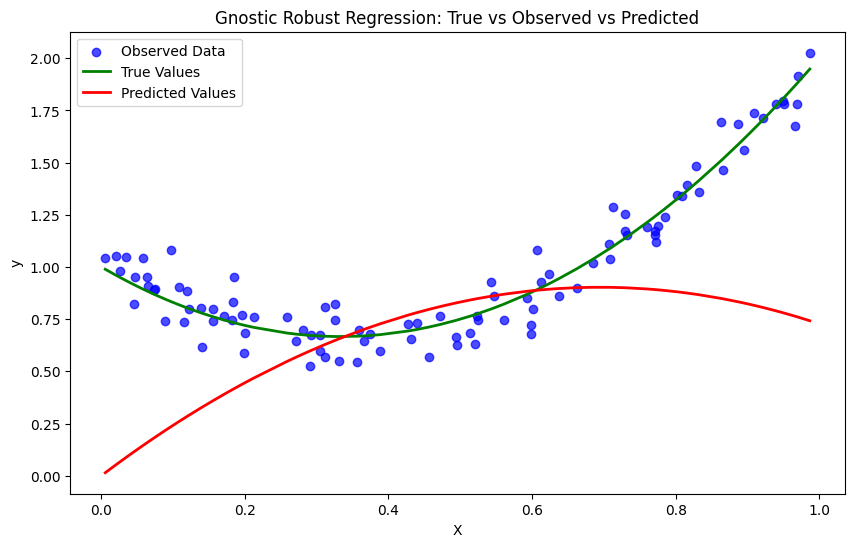

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)  # Single feature
y_true = 3 * X[:, 0]**2 - 2 * X[:, 0] + 1  # True quadratic function
y_observed = y_true + np.random.normal(0, 0.1, size=100)  # Add noise to create observed data

# Initialize and fit the model with degree 2 (quadratic regression)
model = GnosticRobustRegression(X, y_observed, criterion="E1", degree=2)
model.fit()

# Predict values
y_pred = model.predict(X)

# Plotting
# Sort the data by X values for proper line plotting
sorted_indices = np.argsort(X[:, 0])  # Sort by the first column of X
X_sorted = X[sorted_indices]
y_true_sorted = y_true[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of observed data
plt.scatter(X, y_observed, label="Observed Data", color="blue", alpha=0.7)

# Plot true values (sorted)
plt.plot(X_sorted, y_true_sorted, label="True Values", color="green", linewidth=2)

# Plot predicted values (sorted)
plt.plot(X_sorted, y_pred_sorted, label="Predicted Values", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("Gnostic Robust Regression: True vs Observed vs Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()
# Show the plot
plt.show()

In [13]:
'''
ManGo - Machine Gnostics Library
Copyright (C) 2025  ManGo Team

This work is licensed under the terms of the GNU General Public License version 3.0.
'''

import numpy as np
from src.magcal.characteristics import GnosticsCharacteristics

class GnosticRobustRegression(GnosticsCharacteristics):
    """
    A class to perform Gnostic Robust Regression based on the iterative formula
    described in Equation 19.2 of the provided reference.
    """

    def __init__(self, X, y, criterion="E1", max_iter=100, tol=1e-6, degree=1, gc_history=False, verbose=False):
            """
            Initialize the regression model.

            Parameters:
            - X: np.ndarray, shape (n_samples, n_features)
                The input feature matrix.
            - y: np.ndarray, shape (n_samples,)
                The target vector.
            - criterion: str
                The gnostic criterion to use (e.g., "Q1", "E1", "Q2", etc.).
            - max_iter: int
                Maximum number of iterations for the regression.
            - tol: float
                Tolerance for convergence.
            - degree: int
                The degree of the polynomial regression. Default is 1 (linear regression).
            - gc_history: bool
                If True, records the history of gnostic characteristics (hi, hj, fi, fj).
            - verbose: bool
                If True, prints additional information during fitting.
            """
            # data checking
            if len(X.shape) != 2:
                raise ValueError("X must be a 2D array.")
            if len(y.shape) != 1:
                raise ValueError("y must be a 1D array.")
            if X.shape[0] != y.shape[0]:
                raise ValueError("Number of samples in X and y must match.")
            
            self.degree = degree
            self.X = self._expand_features(X, degree)
            self.y = y
            self.criterion = criterion
            self.max_iter = max_iter
            self.tol = tol
            self.gc_history = gc_history
            self.weights = np.ones(self.X.shape[0])  # Initialize weights to 1
            self.coefficients = None
            self.history = {"hi": [], "hj": [], "fi": [], "fj": [], "re": []} if gc_history else None
            self.verbose = verbose

    def _compute_filtering_weight(self, residuals):
        """
        Compute the filtering weights based on the selected gnostic criterion.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The updated filtering weights.
        """
        # compute q and q1
        eps_max = np.finfo(float).max
        eps_min = np.finfo(float).eps
        # y0 - the initial estimate
        # Avoid division by zero or invalid values
        y0 = np.dot(self.X, self.coefficients)
        y0 = np.where(np.abs(y0) < eps_min, eps_min, y0)  # Replace near-zero values with eps_min

        q = self.y / y0
        q = np.where(np.abs(q) < eps_min, eps_min, q)  # Replace near-zero values with eps_min
        q = np.where(np.abs(q) > eps_max, eps_max, q)  # Cap values exceeding eps_max

        q1 = 1 / q
        q1 = np.where(np.abs(q1) < eps_min, eps_min, q1)  # Replace near-zero values with eps_min
        q1 = np.where(np.abs(q1) > eps_max, eps_max, q1)  # Cap values exceeding eps_max

        if self.criterion == "Q1":
            return f_q
        elif self.criterion == "E1":
            return f_e ** 2
        elif self.criterion == "Q2":
            return np.ones_like(residuals)  # Constant weight for Q2
        elif self.criterion == "E2":
            return f_e
        elif self.criterion == "Q3":
            return 1 / np.sqrt(f_q)
        elif self.criterion == "E3":
            return np.sqrt(f_e)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")

    def _update_weights(self, residuals):
        """
        Update the weights based on the residuals and the filtering function.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.
        """
        self.weights = self._compute_filtering_weight(residuals)
    
    def _expand_features(self, X, degree):
        """
        Expand the input feature matrix to include polynomial terms up to the specified degree.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.
        - degree: int
            The degree of the polynomial regression.

        Returns:
        - X_expanded: np.ndarray, shape (n_samples, n_expanded_features)
            The expanded feature matrix with polynomial terms.
        """
        X_expanded = X
        for d in range(2, degree + 1):
            X_expanded = np.hstack([X_expanded, X ** d])
        return X_expanded

    def fit(self):
        """
        Fit the regression model using the iterative weighted least squares approach.
        """
        n_samples, n_features = self.X.shape
        X_weighted = self.X.copy()
        y_weighted = self.y.copy()

        # Initialize coefficients
        self.coefficients = np.zeros(n_features)

        for iteration in range(self.max_iter):
            # Compute residuals
            residuals = self.y - np.dot(self.X, self.coefficients)

            # Update weights
            self._update_weights(residuals)

            # Apply weights to the design matrix and target vector
            W = np.sqrt(self.weights)[:, np.newaxis]
            X_weighted = W * self.X
            y_weighted = W.flatten() * self.y

            # Check for NaNs or infinities
            if not np.isfinite(X_weighted).all() or not np.isfinite(y_weighted).all():
                raise ValueError("NaN or infinity detected in weighted matrices. Check your data or weights.")

            # Solve the weighted least squares problem
            new_coefficients = np.linalg.lstsq(X_weighted, y_weighted, rcond=None)[0]

            # Check for convergence
            if np.linalg.norm(new_coefficients - self.coefficients) < self.tol:
                if self.verbose:
                    print(f"Converged in {iteration + 1} iterations.")
                break

            self.coefficients = new_coefficients
        else:
            print("Maximum iterations reached without convergence.")

    # Modify predict method
    def predict(self, X):
        """
        Predict target values for the given input data.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.

        Returns:
        - y_pred: np.ndarray, shape (n_samples,)
            The predicted target values.
        """
        X_expanded = self._expand_features(X, self.degree)
        return np.dot(X_expanded, self.coefficients)

    def get_weights(self):
        """
        Get the final weights after fitting the model.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The final weights.
        """
        return self.weights

    def get_coefficients(self):
        """
        Get the fitted coefficients of the model.

        Returns:
        - coefficients: np.ndarray, shape (n_features,)
            The fitted coefficients.
        """
        return self.coefficients



ModuleNotFoundError: No module named 'src'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)  # Single feature
y_true = 3 * X[:, 0]**2 - 2 * X[:, 0] + 1  # True quadratic function
y_observed = y_true + np.random.normal(0, 0.1, size=100)  # Add noise to create observed data

# Initialize and fit the model with degree 2 (quadratic regression)
model = GnosticRobustRegression(X, y_observed, criterion="E1", max_iter=100, tol=1e-6, degree=3, gc_history=True)
model.fit()

# Predict values
y_pred = model.predict(X)

# Sort the data by X values for proper line plotting
sorted_indices = np.argsort(X[:, 0])  # Sort by the first column of X
X_sorted = X[sorted_indices]
y_true_sorted = y_true[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of observed data
plt.scatter(X, y_observed, label="Observed Data", color="blue", alpha=0.7)

# Plot true values (sorted)
plt.plot(X_sorted, y_true_sorted, label="True Values", color="green", linewidth=2)

# Plot predicted values (sorted)
plt.plot(X_sorted, y_pred_sorted, label="Predicted Values", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("Gnostic Robust Regression: True vs Observed vs Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

In [ ]:
model.history

In [ ]:
import matplotlib.pyplot as plt

# Ensure history tracking is enabled
if model.history:
    history = model.get_history()

    # Plot hi and fi over iterations
    plt.figure(figsize=(12, 6))

    # Plot hi
    plt.subplot(1, 2, 1)
    for i, hi in enumerate(history["hi"]):
        plt.plot(hi, label=f"Iteration {i+1}")
    plt.title("hi (Gnostic Characteristics) Over Iterations")
    plt.xlabel("Sample Index")
    plt.ylabel("hi")
    plt.legend()

    # Plot fi
    plt.subplot(1, 2, 2)
    for i, fi in enumerate(history["fi"]):
        plt.plot(fi, label=f"Iteration {i+1}")
    plt.title("fi (Filtering Weights) Over Iterations")
    plt.xlabel("Sample Index")
    plt.ylabel("fi")
    plt.legend()
    # do not show label

    plt.tight_layout()
    plt.show()
else:
    print("History tracking is disabled. Set gc_history=True to enable it.")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure history tracking is enabled
if model.history:
    history = model.get_history()

    # Extract re (residual entropy) from the history
    re_history = np.array(history["re"])  # residual entropy (fJ - fI) over iterations

    # Plotting residual entropy
    plt.figure(figsize=(10, 6))

    # Plot re lines for each iteration
    for iteration, re_iter in enumerate(re_history):
        plt.plot(re_iter, label=f"Residual Entropy (Iteration {iteration + 1})", alpha=0.7)

    # Add labels, title, and legend
    plt.title("Residual Entropy (fJ - fI) Over Iterations")
    plt.xlabel("Sample Index")
    plt.ylabel("Residual Entropy (fJ - fI)")
    plt.legend(loc="upper right", fontsize="small")

    # Show the plot
    # plt.tight_layout()
    plt.show()
else:
    print("History tracking is disabled. Set gc_history=True to enable it.")

In [ ]:
'''
ManGo - Machine Gnostics Library
Copyright (C) 2025  ManGo Team

This work is licensed under the terms of the GNU General Public License version 3.0.
'''

import numpy as np

class GnosticsCharacteristics:
    """
    A class containing internal functions for Machine Gnostics (MG) calculations.

    Notes
    -----
    The class takes an input matrix R = Z / Z0, where:
        - Z  : Observed data
        - Z0 : Estimated value

    Internally, it computes:
        - q  = R
        - q1 = 1 / R  (with protection against division by zero)

    The internal methods (_fi, _fj, _hi, _hj) operate on q and q1 to calculate
    various gnostic characteristics.

    Methods
    -------
    _fi(q, q1)
        Calculates the estimation weight.

    _fj(q, q1)
        Calculates the quantification weight.

    _hi(q, q1)
        Calculates the estimation relevance.

    _hj(q, q1)
        Calculates the quantification relevance.
    """

    def __init__(self, R: np.ndarray):
        """
        Initializes the GnosticsCharacteristics class.

        Parameters
        ----------
        R : np.ndarray
            The input matrix for the gnostics calculations (R = Z / Z0).
        """
        max_eps = np.finfo(float).max
        min_eps = np.finfo(float).eps
        self.R = R
        self.q = R
        # avoid division by zero
        self.q1 = np.where(np.abs(R) > min_eps, 1 / R, max_eps)

    def _fi(self, q=None, q1=None):
        """
        Calculates the estimation weight.

        Parameters
        ----------
        q : np.ndarray or float
        q1 : np.ndarray or float

        Returns
        -------
        f : np.ndarray or float
        """
        if q is None:
            q = self.q
        if q1 is None:
            q1 = self.q1

        q = np.asarray(q)
        q1 = np.asarray(q1)
        if q.shape != q1.shape:
            raise ValueError("q and q1 must have the same shape")
        f = 2 / (q + q1)
        return f

    def _fj(self, q=None, q1=None):
        """
        Calculates the quantification weight.

        Parameters
        ----------
        q : np.ndarray or float
        q1 : np.ndarray or float

        Returns
        -------
        f : np.ndarray or float
        """
        if q is None:
            q = self.q
        if q1 is None:
            q1 = self.q1

        q = np.asarray(q)
        q1 = np.asarray(q1)
        if q.shape != q1.shape:
            raise ValueError("q and q1 must have the same shape")
        f = (q + q1) / 2
        return f

    def _hi(self, q=None, q1=None):
        """
        Calculates the estimation relevance.

        Parameters
        ----------
        q : np.ndarray or float
        q1 : np.ndarray or float

        Returns
        -------
        h : np.ndarray or float
        """
        if q is None:
            q = self.q
        if q1 is None:
            q1 = self.q1
        q = np.asarray(q)
        q1 = np.asarray(q1)
        if q.shape != q1.shape:
            raise ValueError("q and q1 must have the same shape")
        h = (q - q1) / (q + q1)
        return h

    def _hj(self, q=None, q1=None):
        """
        Calculates the quantification relevance.

        Parameters
        ----------
        q : np.ndarray or float
        q1 : np.ndarray or float

        Returns
        -------
        h : np.ndarray or float
        """
        if q is None:
            q = self.q
        if q1 is None:
            q1 = self.q1
            
        q = np.asarray(q)
        q1 = np.asarray(q1)
        if q.shape != q1.shape:
            raise ValueError("q and q1 must have the same shape")
        h = (q - q1) / 2
        return h
    
    def _rentropy(self, fi, fj):
        """
        Calculates the residual entropy.

        Parameters
        ----------
        fi : np.ndarray or float
            Estimation weight.
        fj : np.ndarray or float
            Quantification weight.

        Returns
        -------
        entropy : np.ndarray or float
            Relative entropy.
        """
        fi = np.asarray(fi)
        fj = np.asarray(fj)
        if fi.shape != fj.shape:
            raise ValueError("fi and fj must have the same shape")
        entropy = fj - fi
        if entropy < 0: #means something is wrong
            raise ValueError("Entropy cannot be negative")
        return entropy


In [ ]:
'''
ManGo - Machine Gnostics Library
Copyright (C) 2025  ManGo Team

This work is licensed under the terms of the GNU General Public License version 3.0.
'''

import numpy as np

class GnosticRobustRegression(GnosticsCharacteristics):
    """
    A class to perform Gnostic Robust Regression based on the iterative formula
    described in Equation 19.2 of the provided reference.
    """

    def __init__(self, X, y, criterion="E1", max_iter=100, tol=1e-6, degree=1, gc_history=False, verbose=False):
            """
            Initialize the regression model.

            Parameters:
            - X: np.ndarray, shape (n_samples, n_features)
                The input feature matrix.
            - y: np.ndarray, shape (n_samples,)
                The target vector.
            - criterion: str
                The gnostic criterion to use (e.g., "Q1", "E1", "Q2", etc.).
            - max_iter: int
                Maximum number of iterations for the regression.
            - tol: float
                Tolerance for convergence.
            - degree: int
                The degree of the polynomial regression. Default is 1 (linear regression).
            - gc_history: bool
                If True, records the history of gnostic characteristics (hi, hj, fi, fj).
            - verbose: bool
                If True, prints additional information during fitting.
            """
            # data checking
            if len(X.shape) != 2:
                raise ValueError("X must be a 2D array.")
            if len(y.shape) != 1:
                raise ValueError("y must be a 1D array.")
            if X.shape[0] != y.shape[0]:
                raise ValueError("Number of samples in X and y must match.")
            
            self.degree = degree
            self.X = self._expand_features(X, degree)
            self.y = y
            self.criterion = criterion
            self.max_iter = max_iter
            self.tol = tol
            self.gc_history = gc_history
            self.weights = np.ones(self.X.shape[0])  # Initialize weights to 1
            self.coefficients = None
            self.history = {"hi": [], "hj": [], "fi": [], "fj": [], "re": []} if gc_history else None
            self.verbose = verbose

    def _compute_filtering_weight(self, residuals):
        """
        Compute the filtering weights based on the selected gnostic criterion.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The updated filtering weights.
        """
        # compute q and q1
        eps_max = np.finfo(float).max
        eps_min = np.finfo(float).eps
        # y0 - the initial estimate
        y0 = np.dot(self.X, self.coefficients)
        # avoid division by zer
        q = self.y/y0
        q = np.where(np.abs(q) > eps_min, q, eps_max)
        q1 = 1 / q
        q1 = np.where(np.abs(q1) > eps_min, q1, eps_max)
        # gnostic characteristics
        h_q = self._fi(q, q1)
        f_q = 1 / (h_q + eps_min)  # Avoid division by zero
        h_e = self._hi(q, q1)
        f_e = 1 / (h_e + eps_min)

        if self.criterion == "Q1":
            return f_q
        elif self.criterion == "E1":
            return f_e ** 2
        elif self.criterion == "Q2":
            return np.ones_like(residuals)  # Constant weight for Q2
        elif self.criterion == "E2":
            return f_e
        elif self.criterion == "Q3":
            return 1 / np.sqrt(f_q)
        elif self.criterion == "E3":
            return np.sqrt(f_e)
        else:
            raise ValueError(f"Unknown criterion: {self.criterion}")

    def _update_weights(self, residuals):
        """
        Update the weights based on the residuals and the filtering function.

        Parameters:
        - residuals: np.ndarray, shape (n_samples,)
            The residuals of the current iteration.
        """
        self.weights = self._compute_filtering_weight(residuals)
    
    def _expand_features(self, X, degree):
        """
        Expand the input feature matrix to include polynomial terms up to the specified degree.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.
        - degree: int
            The degree of the polynomial regression.

        Returns:
        - X_expanded: np.ndarray, shape (n_samples, n_expanded_features)
            The expanded feature matrix with polynomial terms.
        """
        X_expanded = X
        for d in range(2, degree + 1):
            X_expanded = np.hstack([X_expanded, X ** d])
        return X_expanded

    def fit(self):
        """
        Fit the regression model using the iterative weighted least squares approach.
        """
        n_samples, n_features = self.X.shape
        X_weighted = self.X.copy()
        y_weighted = self.y.copy()

        # Initialize coefficients
        self.coefficients = np.zeros(n_features)

        for iteration in range(self.max_iter):
            # Compute residuals
            residuals = self.y - np.dot(self.X, self.coefficients)

            # Update weights
            self._update_weights(residuals)

            # Apply weights to the design matrix and target vector
            W = np.sqrt(self.weights)[:, np.newaxis]
            X_weighted = W * self.X
            y_weighted = W.flatten() * self.y

            # Solve the weighted least squares problem
            new_coefficients = np.linalg.lstsq(X_weighted, y_weighted, rcond=None)[0]

            # Check for convergence
            if np.linalg.norm(new_coefficients - self.coefficients) < self.tol:
                if self.verbose:
                    print(f"Converged in {iteration + 1} iterations.")
                break

            self.coefficients = new_coefficients
        else:
            print("Maximum iterations reached without convergence.")

    # Modify predict method
    def predict(self, X):
        """
        Predict target values for the given input data.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
            The input feature matrix.

        Returns:
        - y_pred: np.ndarray, shape (n_samples,)
            The predicted target values.
        """
        X_expanded = self._expand_features(X, self.degree)
        return np.dot(X_expanded, self.coefficients)

    def get_weights(self):
        """
        Get the final weights after fitting the model.

        Returns:
        - weights: np.ndarray, shape (n_samples,)
            The final weights.
        """
        return self.weights

    def get_coefficients(self):
        """
        Get the fitted coefficients of the model.

        Returns:
        - coefficients: np.ndarray, shape (n_features,)
            The fitted coefficients.
        """
        return self.coefficients

